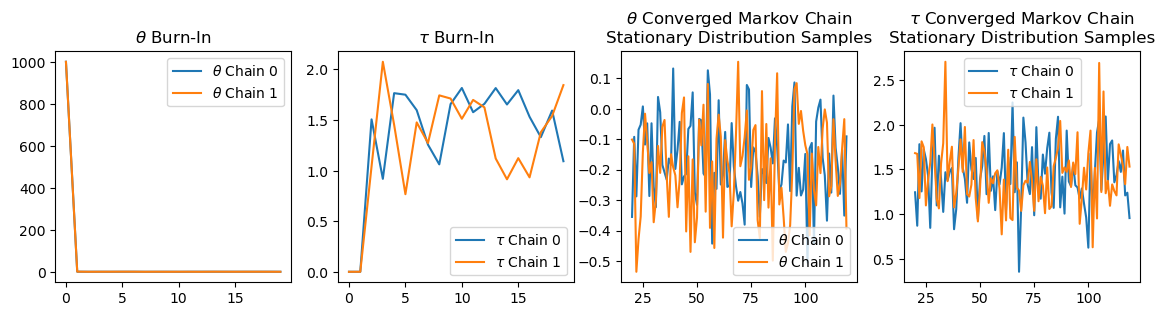

In [11]:
#Q1
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C, G = 2, 10000  # chains, Gibbs samples
theta, tau = np.zeros([C, G]), np.zeros([C, G])
theta[:, 0] = 1000  # initialization

for c in range(C):
    for g in range(1, G):

        alpha_post = (n + 1) / 2
        lambda_post = (lambda_ + np.sum((x - theta[c, g-1])**2)) / 2
        tau[c, g] = stats.gamma(a=alpha_post, scale=1/lambda_post).rvs()
        

        mean_post = (tau_0 * theta_0 + tau[c, g] * np.sum(x)) / (tau_0 + n * tau[c, g])
        var_post = 1 / (tau_0 + n * tau[c, g])
        theta[c, g] = stats.norm(loc=mean_post, scale=np.sqrt(var_post)).rvs()

fig, ax = plt.subplots(1, 4, figsize=(14, 3))
ax[0].set_title("$\\theta$ Burn-In")
ax[1].set_title("$\\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")

burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c, :burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c, :burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c, burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c, burn:demo], label="$\\tau$ Chain "+str(c))

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.show()

Q2

By adjusting alpha and lambda, we can control the amount and nature of the information contributed by the prior to the posterior. alpha and lambda influence the shape and scale of the prior distribution, and they can be interpreted as controlling the "effective number of data points" contributed by the prior. Specifically, larger values of alpha and lambda make the prior more concentrated and confident, effectively contributing more "data points" and giving the prior greater weight in the posterior. In contrast, smaller values of alpha and lambda result in a more diffuse prior, contributing fewer "data points," and causing the posterior to rely more heavily on the actual data (likelihood). Thus, alpha and lambda act as balancing parameters between the information contributed by the prior and the likelihood.

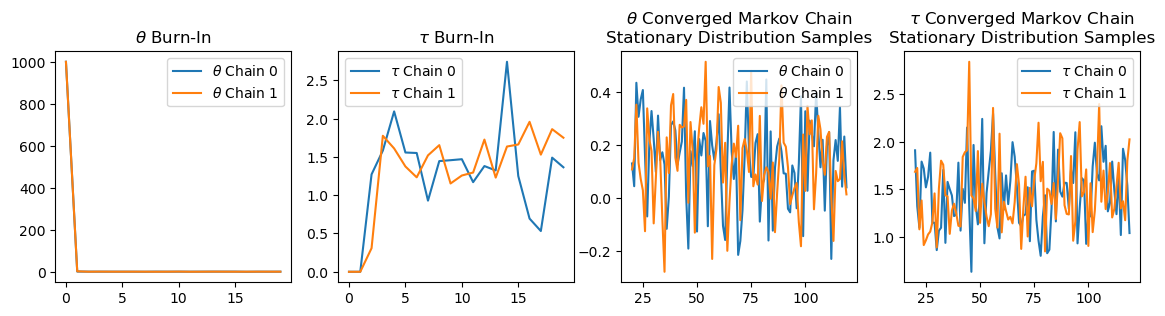

In [2]:
#Q2
#Updated Gibbs Sampler
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)  
C, G = 2, 10000  # chains, Gibbs samples
theta, tau = np.zeros([C, G]), np.zeros([C, G])
theta[:, 0] = 1000  # initialization

for c in range(C):
    for g in range(1, G):
        
        alpha_tau = (n + 1) / 2 + alpha
        beta_tau = (lambda_ + np.sum((x - theta[c, g-1])**2)) / 2
        tau[c, g] = stats.gamma(a=alpha_tau, scale=1/beta_tau).rvs()

        mean_theta = (tau_0 * theta_0 + tau[c, g] * np.sum(x)) / (tau_0 + n * tau[c, g])
        var_theta = 1 / (tau_0 + n * tau[c, g])
        theta[c, g] = stats.norm(loc=mean_theta, scale=np.sqrt(var_theta)).rvs()

fig, ax = plt.subplots(1, 4, figsize=(14, 3))
ax[0].set_title("$\\theta$ Burn-In")
ax[1].set_title("$\\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")

burn = 20  
demo = 120  
for c in range(C):
    ax[0].plot(theta[c, :burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c, :burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c, burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c, burn:demo], label="$\\tau$ Chain "+str(c))

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.show()

In [8]:
#Q3
#Finding the Multinomial-Dirichlet Posterior
![](HW3.png)

/bin/bash: -c: line 1: syntax error near unexpected token `HW3.png'
/bin/bash: -c: line 1: `[](HW3.png)'


In short, for the Beta-Binomial model, the posterior is a Beta distribution with updated parameters. For the multinomial-Dirichlet model, the posterior is a Dirichlet distribution with updated parameters.
This means we can identify the exact form of the posterior by examining the functional form of the joint distribution. For example, if the kernel of the joint distribution matches that of a known distribution, the posterior belongs to that distribution family.
However, in practice, Bayesian methods often rely on sampling techniques to generate samples from the posterior rather than deriving its exact form. These samples are used to create histograms, compute credible intervals, and make probabilistic inferences. Thus, while analytical derivations help us understand the form of the posterior, sampling methods are more practical and commonly used in real-world applications.